<a href="https://colab.research.google.com/github/icdath95/DATA-analyst/blob/sub/%EC%97%AC%EB%9F%AC%EA%B0%9C%EC%9D%98_%EC%97%91%EC%85%80%ED%8C%8C%EC%9D%BC_%ED%86%B5%ED%95%A9_%EC%A0%95%EB%A6%AC%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 이 사람들 다 어디로 가는거지?
## 지하철 이용현황 공공데이터 분석

In [4]:
#엑셀 파일 통합하기

# 내 컴퓨터 파일 조회하기
# 반복문을 통한 파일 열기 / 병합하기
# 일자/요일 데이터 정리하기
# 저장하기

In [5]:
import pandas as pd

In [6]:
file = '/home/CARD_SUBWAY_MONTH_201901.csv'

raw = pd.read_csv(file)

raw.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,경춘선,1323,가평,1520,1436,20190104
1,20190101,경춘선,1322,상천,275,114,20190104
2,20190101,경춘선,1321,청평,1509,1083,20190104
3,20190101,경춘선,1320,대성리,357,271,20190104
4,20190101,경춘선,1319,마석,1772,1963,20190104


In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18334 entries, 0 to 18333
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    18334 non-null  int64 
 1   노선명     18334 non-null  object
 2   역ID     18334 non-null  int64 
 3   역명      18334 non-null  object
 4   승차총승객수  18334 non-null  int64 
 5   하차총승객수  18334 non-null  int64 
 6   등록일자    18334 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1002.8+ KB


## 참고) 판다스로 파일 읽어오기

데이터 파일 읽기: read_excel / read_csv
pd.read_excel('파일경로+파일명.xlsx')

pd.read_csv('파일경로+파일명.csv', encoding = 'utf-8')

pd.read_csv('파일경로+파일명.csv', encoding = 'cp949') # MS 엑셀에서 저장한 경우

#자주 사용하는 옵션
pd.read_excel('파일경로', 옵션1 = 값1, 옵션2 = 값2 ....)

옵션 종류

index_col = 컬럼인덱스번호 # 몇번째 컬럼을 인덱스로 지정할 것인지 선택

header = row인덱스번호 # 몇번째 row 부터 표 데이터로 볼 것인지 선택
thousands = ',' # 천 단위 기호
 , 사용 --> xxx,xxx 문자가 아닌 숫자로 인식
참고 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

In [8]:
#이번에 여러파일을 불러오기
# 2개 파일 불러와서 합치기

raw = pd.DataFrame()

file1 = '/home/CARD_SUBWAY_MONTH_201901.csv'
file2 = "/home/CARD_SUBWAY_MONTH_201902.csv"

temp = pd.read_csv(file1)
raw.append(temp)

temp = pd.read_csv(file2)
raw= raw.append(temp)

In [9]:
# ? 폴더에 있는 모든 파일을 불러와서 병합할 수 있을까?

# 폴더/파일을 관리하는 os 라이브러리를 불러옵니다.

import os 

In [10]:
# os.listir()을 이용해 rawfiles 폴더에 있는 파일 리스트를 살펴봄
dirpath = "/home/"
files = os.listdir(dirpath)
files

['CARD_SUBWAY_MONTH_201902.csv',
 'CARD_SUBWAY_MONTH_201901.csv',
 'CARD_SUBWAY_MONTH_201906.csv',
 'CARD_SUBWAY_MONTH_201904.csv',
 'CARD_SUBWAY_MONTH_201905.csv',
 'CARD_SUBWAY_MONTH_201903.csv']

In [11]:
# 여러개의 파일을 병합

# 합치는 방법

# 1. 빈 데이터 프레임을 준비
raw = pd.DataFrame()

# 반복문 -> csv 파일 읽기 -> 데이터프레임에 추가하기.
for file in files:
  #print(dirpath + file)
  temp = pd.read_csv(dirpath + file)
  raw = raw.append(temp)  #append는 원본데이터에 한번 넣어봄? 느낌 꼭 앞에 =로 저장해줘야햄
  #raw = raw.append(temp, ignore_index = True)   ignore_index = True  --> 기존 인덱스는 무시하고
raw.tail()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
12424,20190331,중앙선,1215,아신,618,564,20190403
12425,20190331,중앙선,1216,오빈,292,264,20190403
12426,20190331,중앙선,1217,양평,2907,2644,20190403
12427,20190331,중앙선,1218,원덕,492,483,20190403
12428,20190331,우이신설선,4704,가오리,2538,2424,20190403


In [12]:
raw.info()
# 위에처럼 자료들을 합치게 되면 index번호가 새로 부여되는게 아니라
# 원래 파일에 들어있던 인덱스 번호를 그대로 사용하게 됨
# 그래서 info에 행이 99342개로 나와도, tail에선 18333이 마지막 숫자야
# 결론적으로는 합치고 인덱스 번호 새로 부여(reset)하자!!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99342 entries, 0 to 12428
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    99342 non-null  int64 
 1   노선명     99342 non-null  object
 2   역ID     99342 non-null  int64 
 3   역명      99342 non-null  object
 4   승차총승객수  99342 non-null  int64 
 5   하차총승객수  99342 non-null  int64 
 6   등록일자    99342 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 6.1+ MB


In [13]:
raw = raw.reset_index(drop = True) # 기존 인덱스 초기화는 drop으로 버려줌
raw.tail()
# 함수 명령어 / 옵션 살펴보기 -> shift + tab

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
99337,20190331,중앙선,1215,아신,618,564,20190403
99338,20190331,중앙선,1216,오빈,292,264,20190403
99339,20190331,중앙선,1217,양평,2907,2644,20190403
99340,20190331,중앙선,1218,원덕,492,483,20190403
99341,20190331,우이신설선,4704,가오리,2538,2424,20190403


## Q. 요일을 추가해보자!

In [14]:
#일시를 관리하는 datetime 라이브러리를 불러오기

from datetime import datetime


datetime.strptime('날짜str', `str형태`)  : 문자 --> 날짜 타입

- `str형태` %Y-%m-%d %H:%M:%S
    - %Y : 연도(4자리)
    - %m:  월(2자리)
    - %d:  일자(2자리)
    
    - %H : 시간
    - %M : 분
    - %S : 초

In [15]:
# datetime.strptime()을 이용해 str타입을 날짜 타입으로 변경
# dtaetime.strptime('날짜str', 형태)
# 숫자가 아닌 문자로 입력되어야 합니다. <<<---@@이부분 핵중요
# ex)

s = '2019-01-05'
datetime.strptime(s, "%Y-%m-%d")#d이후에 시 분 초 추가 가능
# 민테 2019는 년, 1=월, 5=날, 0=시, 0=분 을 뜻함

datetime.datetime(2019, 1, 5, 0, 0)

In [16]:
# 날짜 타입을 요일로 변경하기 위해서는 weekday() 를 사용합니다. 
# 월요일 : 0 ~ 일요일 : 6

s = '20190629'
date = datetime.strptime(s, '%Y%m%d')
date

weekday_dict = ['월', '화', '수', '목', '금', '토', '일']
weekday_index = date.weekday()
print(weekday_index)
print(weekday_dict[weekday_index])

5
토


In [17]:
# 날짜 컬럼을 불러와서, 순서대로 요일을 정리하여 리스트에 저장

raw.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190201,중앙선,1213,신원,186,164,20190204
1,20190201,중앙선,1214,국수,668,669,20190204
2,20190201,중앙선,1215,아신,556,571,20190204
3,20190201,중앙선,1216,오빈,300,307,20190204
4,20190201,중앙선,1217,양평,2975,3236,20190204


In [18]:
raw.info()
# 위에서도 말했지만 str사용하려면 숫자가(int형)이 아닌 문자형으로
# 작성되어야 한다 이말이야~~

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99342 entries, 0 to 99341
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    99342 non-null  int64 
 1   노선명     99342 non-null  object
 2   역ID     99342 non-null  int64 
 3   역명      99342 non-null  object
 4   승차총승객수  99342 non-null  int64 
 5   하차총승객수  99342 non-null  int64 
 6   등록일자    99342 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 5.3+ MB


In [19]:
# 날짜 컬럼을 불러와서, 순서대로 요일을 점검하여 리스트에 저장하겠다.

weekday_dict = ['월', '화', '수', '목', '금', '토', '일']
weekday_list = [ ]

for date_str in raw['사용일자']:

# print(type(date_str))    밑에 str함수가 바꿔줌

  date = datetime.strptime(str(date_str), "%Y%m%d")
  weekday_index = date.weekday()
  weekday = weekday_dict[weekday_index]

  weekday_list.append(weekday)

In [20]:
# 요일정보가 저장된 리스트를 컬럼에 추가

raw['요일'] = weekday_list

raw.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,요일
0,20190201,중앙선,1213,신원,186,164,20190204,금
1,20190201,중앙선,1214,국수,668,669,20190204,금
2,20190201,중앙선,1215,아신,556,571,20190204,금
3,20190201,중앙선,1216,오빈,300,307,20190204,금
4,20190201,중앙선,1217,양평,2975,3236,20190204,금


In [21]:
# .head()와 .tail() 사이의 임의의 샘플을 보고 싶을때
raw.sample(10)

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,요일
52622,20190401,경강선,1503,삼동,2513,2192,20190404,월
23945,20190113,3호선,312,불광,12540,14222,20190116,일
63920,20190421,7호선,2735,반포,3904,3958,20190424,일
48331,20190623,3호선,326,압구정,18444,19295,20190626,일
60415,20190414,4호선,434,남태령,1052,772,20190417,일
49485,20190625,4호선,419,한성대입구(삼선교),17585,16633,20190628,화
57984,20190410,분당선,1857,정자,20223,21742,20190413,수
4836,20190209,3호선,315,무악재,3036,3104,20190212,토
38694,20190607,경강선,1505,초월,2672,2558,20190610,금
97075,20190328,분당선,1850,선정릉,9500,10509,20190331,목


In [22]:
# 컬럼 순서변경하기 : 사용일자 뒤로 요일이 나오게 변경

# 현재 컬럼명 확인
raw.columns

Index(['사용일자', '노선명', '역ID', '역명', '승차총승객수', '하차총승객수', '등록일자', '요일'], dtype='object')

In [23]:
# 현재 컬럼명 복사해서 원하는 순서대로 조정하기

raw = raw[['사용일자', '요일', '노선명', '역ID', '역명', '승차총승객수', '하차총승객수', '등록일자']]

## 정리한 데이터 저장하기

In [24]:
# 주피터에서 작업한 결과를 data 폴더에 저장하겠습니다. 
# raw.to_excel('./data/subway_raw.xlsx', index = False)

# 코랩에서 작업한 결과 저장하기
raw.to_excel('/home/1234.xlsx')

##Q) 언제 지하철을 가장 많이 이용할까?

In [25]:
# 필요한 라이브러리 불러오기
import pandas as pd
raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190201,금,중앙선,1213,신원,186,164,20190204
1,20190201,금,중앙선,1214,국수,668,669,20190204
2,20190201,금,중앙선,1215,아신,556,571,20190204
3,20190201,금,중앙선,1216,오빈,300,307,20190204
4,20190201,금,중앙선,1217,양평,2975,3236,20190204


In [26]:
raw.info()
#데이터 불러오고나서 컬럼과 행의 갯수는 몇개인지 비어있는 값(non-null)의 개수는 같은가
#데이터 타입은 어떻게 설정되어 있는지 확인하는 습관 기르기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99342 entries, 0 to 99341
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    99342 non-null  int64 
 1   요일      99342 non-null  object
 2   노선명     99342 non-null  object
 3   역ID     99342 non-null  int64 
 4   역명      99342 non-null  object
 5   승차총승객수  99342 non-null  int64 
 6   하차총승객수  99342 non-null  int64 
 7   등록일자    99342 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 6.1+ MB


## Q) 가장 승객이 많은 날짜?

In [27]:
# pivot_table을 이용해 사용일자/요일별 승차승객수 합계 데이터 정리
# index = [사용일자, 요일] values = 승차총승객수

data_date = raw.pivot_table(index = ['사용일자','요일'], values = '승차총승객수', aggfunc='sum')
data_date.head()

,,승차총승객수
사용일자,요일,
20190101,화,3419948
20190102,수,7621668
20190103,목,7873692
20190104,금,8270345
20190105,토,6062294


In [28]:
# sort_values()를 이용해 승객수 기준 정렬한다

data_date.sort_values(by = '승차총승객수', ascending= False)

,,승차총승객수
사용일자,요일,
20190503,금,9229899
20190510,금,9164243
20190524,금,9068976
20190517,금,9058227
20190412,금,9012472
...,...,...
20190206,수,3741895
20190101,화,3419948
20190203,일,3412440


## Q) 5월에 지하철 승객수가 많다?

## Q) 금요일에 승객수가 많다?

가정1) 5월에 승객수가 많다??

월별 승객수 비교 -> 필요한 컬럼 추가하기(연월)

In [29]:
# 현재 일지/요일 데이터만 존재하며, 월 데이터는 존재하지 않아, 일자데이터에서 필요한 월 데이터 추출

raw.tail()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
99337,20190331,일,중앙선,1215,아신,618,564,20190403
99338,20190331,일,중앙선,1216,오빈,292,264,20190403
99339,20190331,일,중앙선,1217,양평,2907,2644,20190403
99340,20190331,일,중앙선,1218,원덕,492,483,20190403
99341,20190331,일,우이신설선,4704,가오리,2538,2424,20190403


In [30]:
# 연월일 데이터에서 연월.월일 데이터 정리

yearmonth_list = []
monthday_list = []
for date in raw['사용일자']:
  yearmonth = str(date)[ :6]
  yearmonth_list.append(yearmonth)
  monthday = str(date)[4: ]
  monthday_list.append(monthday)


In [31]:
# 연월/ 월일 컬럼 추가하기
raw['연월'] = yearmonth_list
raw['월일'] = monthday_list
raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,연월,월일
0,20190201,금,중앙선,1213,신원,186,164,20190204,201902,0201
1,20190201,금,중앙선,1214,국수,668,669,20190204,201902,0201
2,20190201,금,중앙선,1215,아신,556,571,20190204,201902,0201
3,20190201,금,중앙선,1216,오빈,300,307,20190204,201902,0201
4,20190201,금,중앙선,1217,양평,2975,3236,20190204,201902,0201


In [32]:
# pivot_table 쓰는법

#raw.pivot_table(index = , values = , aggfunc =)

#pd.pivot_table(data = , index = , values = , aggfunc =)

#pd.pivot_table( raw , index = , values = , aggfunc =)
#=> 어차피 첫순서는 데이터프레임이기때문에 굳이 data=안써도 된다고 함

In [33]:
# 월별 승객수를 정리하겠습니다. 
data_month = pd.pivot_table(raw, index = '연월', values = '승차총승객수', aggfunc='sum')
data_month = data_month.sort_values(by = '승차총승객수', ascending= False)
data_month #.head()

,승차총승객수
연월,
201905,236267004
201901,221848014
201906,221547039
201904,218832085
201902,190335812
201903,157782643


### 가정1)   5월에 승객수가 많다??    --> `True`

## 가정2) 금요일에 승객수가 많다?

In [34]:
raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,연월,월일
0,20190201,금,중앙선,1213,신원,186,164,20190204,201902,0201
1,20190201,금,중앙선,1214,국수,668,669,20190204,201902,0201
2,20190201,금,중앙선,1215,아신,556,571,20190204,201902,0201
3,20190201,금,중앙선,1216,오빈,300,307,20190204,201902,0201
4,20190201,금,중앙선,1217,양평,2975,3236,20190204,201902,0201


In [37]:
# 요일별 승객수를 정리

data_week = pd.pivot_table(data = raw, index = '요일', values = '승차총승객수', aggfunc='sum')
data_week = data_week.sort_values(by = '승차총승객수', ascending = False)
data_week

,승차총승객수
요일,
금,214064383
화,198116552
목,197522587
월,187921393
수,176959733
토,157401217
일,114626732


## 월별로 편차가 존재할까? --> 월별 / 일자별 승객수 그래프로 살펴보기

In [38]:
# 먼저 1개월 데이터 선택하기

yearmonth = '201901'
cond = raw['연월'] == yearmonth
cond

0        False
1        False
2        False
3        False
4        False
         ...  
99337    False
99338    False
99339    False
99340    False
99341    False
Name: 연월, Length: 99342, dtype: bool

In [41]:
df_selceted = raw[cond]
df_selceted

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,연월,월일
16543,20190101,화,경춘선,1323,가평,1520,1436,20190104,201901,0101
16544,20190101,화,경춘선,1322,상천,275,114,20190104,201901,0101
16545,20190101,화,경춘선,1321,청평,1509,1083,20190104,201901,0101
16546,20190101,화,경춘선,1320,대성리,357,271,20190104,201901,0101
16547,20190101,화,경춘선,1319,마석,1772,1963,20190104,201901,0101
...,...,...,...,...,...,...,...,...,...,...
34872,20190131,목,1호선,155,동대문,14563,15139,20190203,201901,0131
34873,20190131,목,1호선,154,종로5가,30249,29703,20190203,201901,0131
34874,20190131,목,1호선,153,종로3가,36804,35050,20190203,201901,0131
34875,20190131,목,1호선,152,종각,51970,50080,20190203,201901,0131


In [44]:
# 1개월 데이터에서 일자/요일별 승객수 계 데이터 정리

df_pivot = df_selceted.pivot_table(index = ['월일', '요일'], values = '승차총승객수', aggfunc = 'sum')
df_pivot.head()

,,승차총승객수
월일,요일,
0101,화,3419948
0102,수,7621668
0103,목,7873692
0104,금,8270345
0105,토,6062294


In [45]:
df_pivot = df_pivot.reset_index()

In [46]:
df_pivot.head()

,월일,요일,승차총승객수
0,0101,화,3419948
1,0102,수,7621668
2,0103,목,7873692
3,0104,금,8270345
4,0105,토,6062294


In [58]:
# 그래프 그리기에 필요한 라이브러리를 불러옵니다. 
# 한글을 표시하기 위해 폰트를 지정합니다. 
#import matplotlib.pyplot as plt
#import seaborn as sns 
#from matplotlib import font_manager, rc
#import platform 

# 한글 폰트 사용
#if platform.system() == 'Windows': 
#    path = 'c:/Windows/Fonts/malgun.ttf'
#    font_name = font_manager.FontProperties(fname=path).get_name()
#    rc('font', family=font_name)
#elif platform.system() == 'Darwin':
#    rc('font', family='AppleGothic')

#    #그래프에서 마이너스 기호가 표시되돌하는 설정
#    matplotlib.rcParams['axes.unicode_minus'] = False

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text

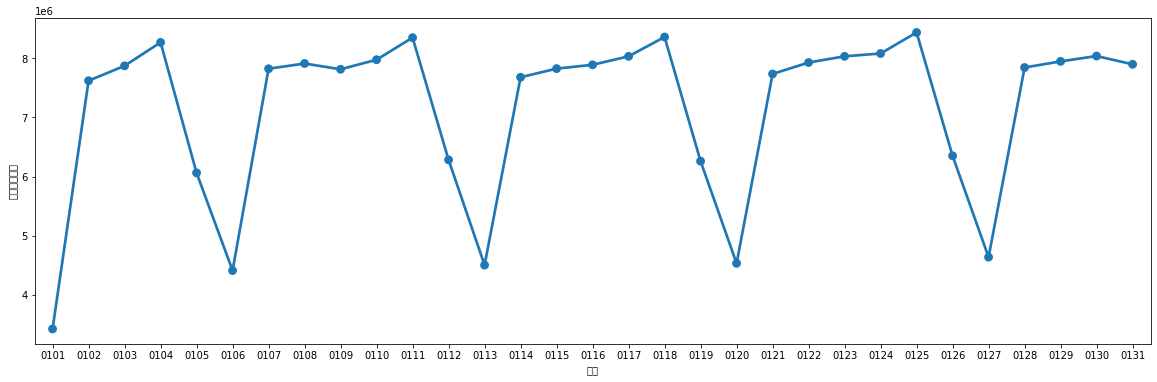

In [51]:
# 일자별 승객수를 그래프로 살펴보기

# 그래프를 그릴 수 있는 공간 준비
fig, ax = plt.subplots( figsize = (20, 6))
# 그래프 그리기
sns.pointplot(data = df_pivot, x = '월일', y = '승차총승객수')

## 월별 일자별 그래프 그리기

In [52]:
raw['연월'].unique()

array(['201902', '201901', '201906', '201904', '201905', '201903'],
      dtype=object)

201902
201901
201906
201904
201905
201903


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52384 missing from current font.
  font.set_

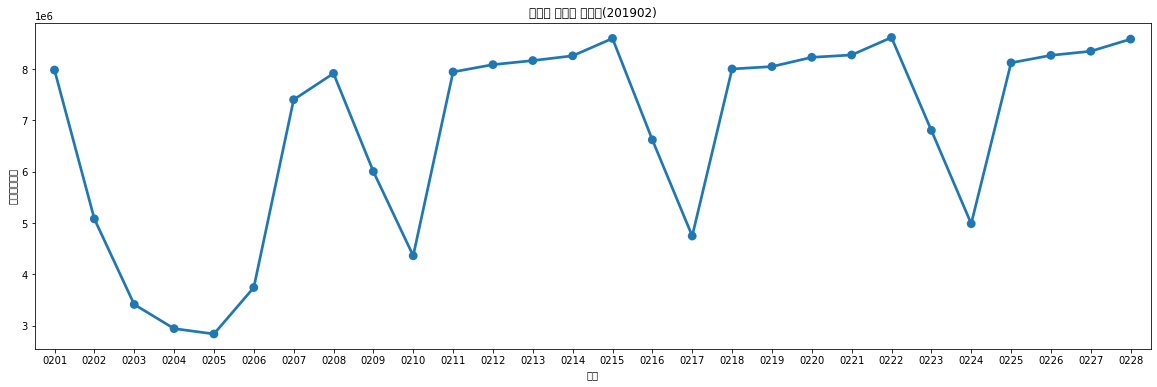

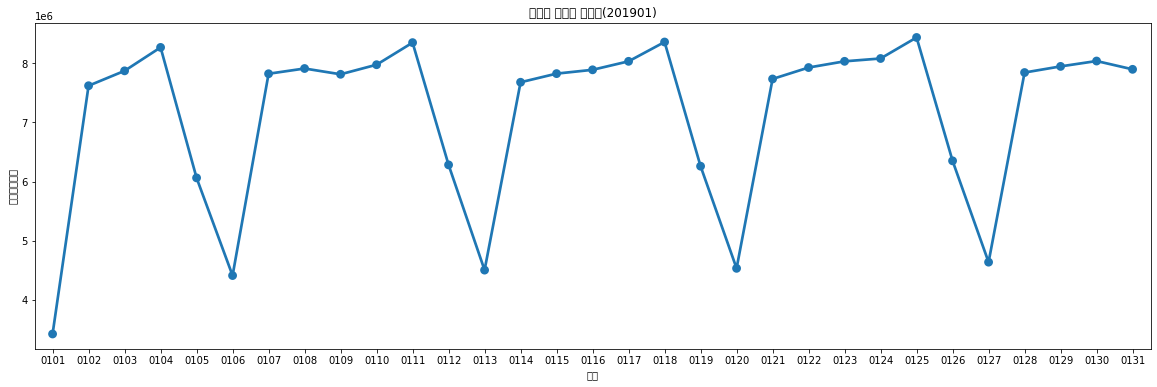

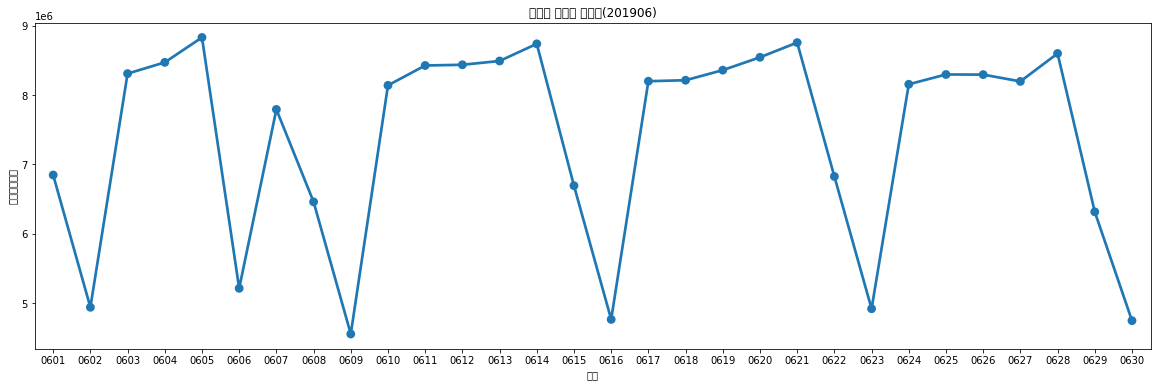

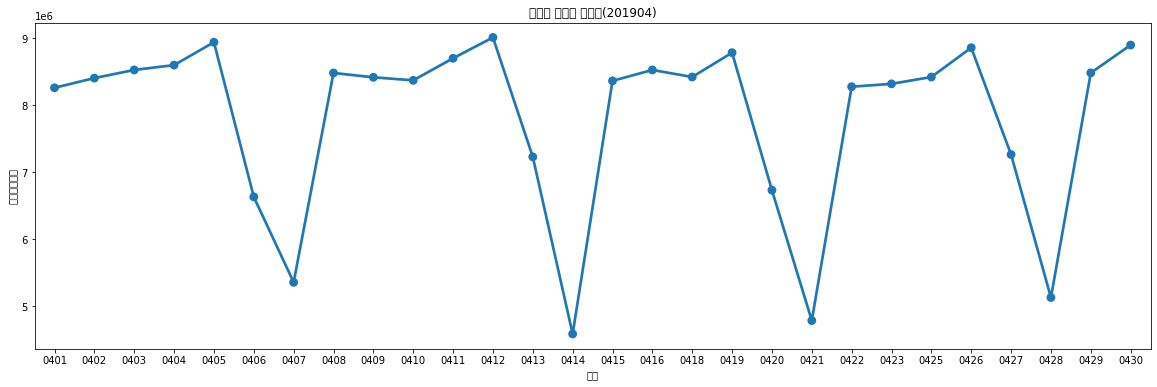

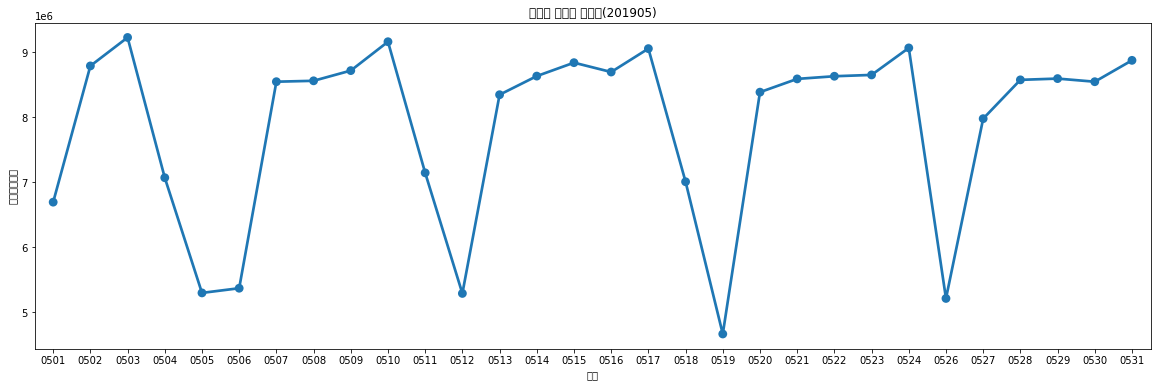

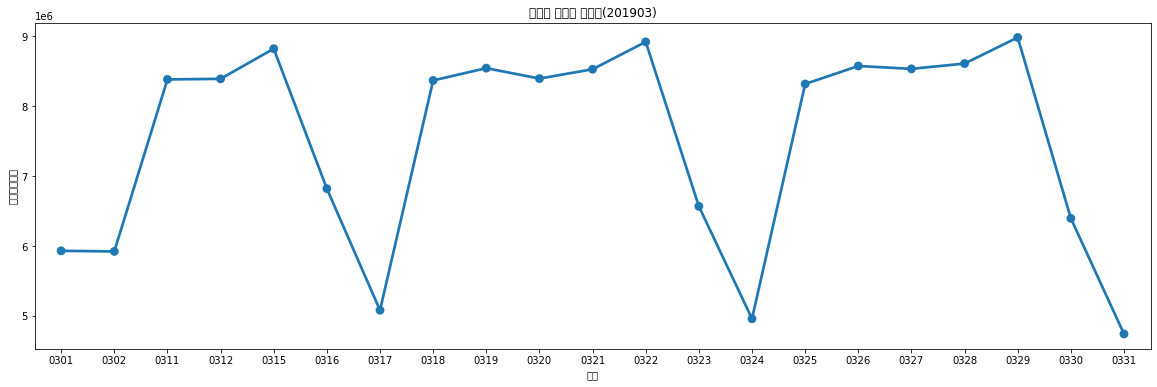

In [61]:
# 반복문 통해 모든 월에 대한 그래프를 그려봄
# 월별 그래프 그리기

for yearmonth in raw['연월'].unique():
  print(yearmonth)

  cond = raw['연월'] == yearmonth
  df_selceted = raw[cond]

  df_pivot = df_selceted.pivot_table(index = ['월일', '요일'], values = '승차총승객수', aggfunc = 'sum')
  df_pivot = df_pivot.reset_index()

#그래프 그릴수 있는 공간 만들기
  fig, ax = plt.subplots( figsize = (20, 6))
  # 그래프 그리기(그래프 제목 설정하기)
  ax.set_title(f'일자별 지하철 승객수({yearmonth})')
  sns.pointplot(data = df_pivot, x = '월일', y = '승차총승객수')

#